# [LAB-11] 1. 상관분석 개요 - 공분산

인과관계를 증명하는 분석은 아님! 걍 상관관계(연관성)만 분석함

## #01. 준비작업

### 1. 패키지 참조:

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

In [3]:
origin = load_data('language_math_scores')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab11_/language_math_scores.xlsx
[desc] 어느 학급의 언어영역과 수리영역 점수를 기록한 가상의 데이터 셋

field     type    description
--------  ------  -------------
언어영역  INT     언어영역 점수
수리영역  INT     수리영역 점수


===== 데이터 크기 확인 =====
데이터셋 크기: (50, 2)
열 갯수: 2
행 갯수: 50

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   언어영역    50 non-null     int64
 1   수리영역    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,언어영역,수리영역
0,66,66
1,58,70
2,73,74
3,52,58
4,72,79


## 탐색적 데이터 분석

- 산점도 그래프를 통한 상관정도 확인

## 공분산

- 정의: 변수 두개 있을때의 공통분산
- by: x 편차랑 y 편차 곱의 평균
  - if x=y -> 공분산 = 분산
- 수식:
- 
$$cov(x, y) = \frac{\sum(x_1 - \bar{x})(y_1-\bar{y})}{N-1}$$

(↑ LaTex 표기법!)

- 공분산=0 이더라도 두 변수가 독립이 아닐 수 있음 (ex. 비선형 관계)
  - 비선형 관계의 두 변수의 공분산은 측적 거의 못함
- 공분산 부호 유지하면서 normalize 한 값: 상관계수
  - 상관계수(r): 두 변수의 상관관계를 나타낸 통계량
  - 파이썬으로 상관분석 시 p-value 값도 함께 나옴
    - r=0: 두 변수간 상관관계 없다

## #01. 상관계수

### 1. 상관관계 해석법

### 2. Pearson 상관계수
- 두 데이터가 선형 관계일 때 상관계수 측정
- 수식:
 $p(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$

- 선형성은 산점도 그래프로 주로 확인
- 이상치 1개라도 있음 피어슨 상관계수 못씀!

### 3. 스피어만 상관계수
- 두 데이터가 비선형 관계거나 이상치 많을 때 상관계수 측정 
  - 순위(rank) 기반 계산이여서 이상치에 덜 민감함

## #02. 상관분석의 가정

1. scatter plot, reg plot, lm plot 그린 후에
2. 값 확인 x, 눈대중으로 선형관계인지, 양/음 관계중 뭔지만 봄
3. 눈대중으로 확인한 이후엔 통계적 검정 과정으로 들어감:
   - Ramsey RESET Test

### 1. 산점도 그래프 그리기 (reg plot):

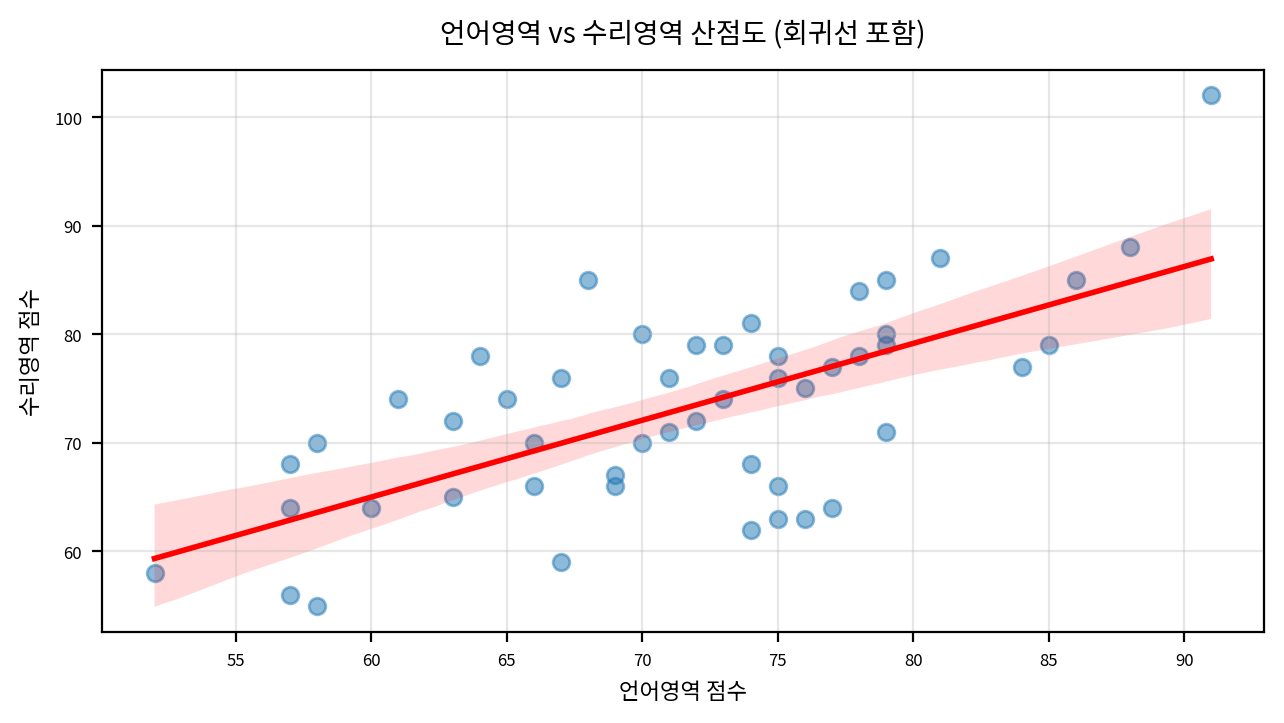

In [4]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 산점도 그래프(Reg Plot) 그리기 (회귀선 포함)
    # regplot()은 hue 파라미터를 지원 안한다 ㅠ
sb.regplot(data = origin, x = '언어영역', y = '수리영역',
           scatter_kws = {'alpha': 0.5},
           line_kws={'color': 'red', 'linewidth': 2})

# 3) 그래프 꾸미기: 
ax.set_title('언어영역 vs 수리영역 산점도 (회귀선 포함)', fontsize=10, pad=10)
ax.set_xlabel('언어영역 점수', fontsize=8)
ax.set_ylabel('수리영역 점수', fontsize=8)
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

### 2. 선형성 통계적 검정

- by: Ramsey RESET Test
  - :회귀모델이 선형인지/아닌지 값을 통해 확인하는 검정법
     - p > 0.05: 대립가설 -> 선형 ㅇ -> 피어슨 상관계수 사용
     - p ≤ 0.05: 귀무가설 -> 선형 x -> 스피어만 상관계수 사용

In [6]:
x = origin['언어영역']
y = origin['수리영역']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
reset = linear_reset(model, power=2, use_f=True)

# 선형성 적합 여부 (적합: True, 부적합: False)
linearity_ok = reset.pvalue > 0.05

print(f"Ramsey RESET Test: {'선형성 적합' if linearity_ok else '선형성 위반'} (p-value: {reset.pvalue:.4f})")

Ramsey RESET Test: 선형성 적합 (p-value: 0.1884)


### 3. 분포의 왜도를 통한 이상치 점검:
- 측정 왜도(skew) by zscore(표준화점수) 
- why? 피어쓴 쓸 지 스피어만 쓸 지 판단하기 위함
  - 피어슨 상관계수(r)은 이상치 있음 못쓰니까.

In [ ]:
# 이상치와 왜도 검정:
data = origin[['언어영역', '수리영역']]
results = {}

for col in data.columns:
    temp = data[col].dropna()

    # 왜도 계산:
    skew_original = temp.skew()

    # Z-score 기반 이상치 탐지 (|z| > 3):
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    # 로그변환 후 왜도 계산 (음수 대비 +1):
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    # 로그변환 필요 여부 판단:
    need_log = (abs(skew_original) > 1) and (abs(skew_log) < abs(skew_original))

    results[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z| > 3)': outlier_count,
        'log_recommended': need_log
    }

results_df = pd.DataFrame(results).T
display(results_df)

# 이상치 점검 결과:
outlier_flag = len(results_df['outliers(|z| > 3)'] > 0) > 0
if outlier_flag:
    print("이상치가 발견되어 스피어만 상관계수 사용")
else: 
    print("이상치가 발견 안되서 피어슨 상관계수 사용")

,original_skew,log_skew,outliers(|z| > 3),log_recommended
언어영역,-0.102559,-1.735952,0,False
수리영역,0.367414,-1.529107,1,False


이상치가 발견되어 스피어만 상관계수 사용


## #03. 상관분석: 피어슨/스피어만 상관계수 (r)

가정할 때 p-value와는 다르게:
- p < 0.05: 대립가설 채택
- p ≥ 0.05: 귀무가설 채택

상관계수(상관유무) -> 추후 다중공선성 제거할 때 쓸 예정

### 1. 피어슨 상관계수:

In [11]:
pearson_r, pearson_p = pearsonr(origin['언어영역'], origin['수리영역'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(pearson_r, pearson_p, "대립" if pearson_p <= 0.05 else "귀무")

'statistic: 0.671, p-value: 0.000, 대립가설 채택'

### 2. 스피어만 상관계수:

In [12]:
spearman_r, spearman_p = spearmanr(origin['언어영역'], origin['수리영역'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(spearman_r, spearman_p, "대립" if spearman_p <= 0.05 else "귀무")

'statistic: 0.599, p-value: 0.000, 대립가설 채택'

### 3. 가정에 따른 상관계수 선택:

- '선형' + '왜도/이상치 적음' -> 피어슨
- '비선형' + '왜도 큼/이상치 많음' -> 스피어만

In [13]:
# 1. what 상관계수 선택?
if linearity_ok and not outlier_flag:
    chosen = 'pearson'
    corr, pval = pearson_r, pearson_p
    rationale = "'선형성 만족' + '왜도/이상치 영향 작음'으로 판단"
else:
    chosen = 'spearman'
    corr, pval = spearman_r, spearman_p
    rationale = "비선형(또는 이상치 영향) 고려"

print('=' * 50)
print('📊상관계수 결과')
print('=' * 50)
print(f"Pearson r: {pearson_r:.3f}, p_value: {pearson_p:.4f}")
print(f"spearman rho: {spearman_r:.3f}, p_value: {spearman_p:.4f}")

print('\n' + '=' * 50)
print('✅최종 선택 결과')
print('=' * 50)
print(f"선택된 방법: {chosen}")
print(f"상관계수: {corr:.3f}")
print(f"p-value: {pval:.4f}")
print(f"선택의 근거: {rationale}")
print('=' * 50)

📊상관계수 결과
Pearson r: 0.671, p_value: 0.0000
spearman rho: 0.599, p_value: 0.0000

✅최종 선택 결과
선택된 방법: spearman
상관계수: 0.599
p-value: 0.0000
선택의 근거: 비선형(또는 이상치 영향) 고려


### 4. 상관행렬 (Correlation Matrix)

- 정의: 여러 변수들 간 상관계수를 한눈에 볼 수 있도록 정리한 표
- 특징:
  - 행,열에 같은 변수들 배치
  - 대각선 값은 항상 1 (∵본인과의 상관계수)
  - 대각선에 대한 대칭 행렬임
  
- 해석법:
  - 1에 가까울수록: 강한 양의 상관관계 (한 변수가 증가하면 다른 변수도 증가)
  - -1에 가까울수록: 강한 음의 상관관계 (한 변수가 증가하면 다른 변수는 감소)
  - 0에 가까울수록: 상관관계 없음(두 변수는 서로 독립)

- 활용:
  - 변수 3개 이상일 때 모든 변수쌍의 상관관계 한번에 확인
  - 다중공선성(multicollinearity)검사: 독립변수 간 상관계수가 0.7~0.8 이상이면 다중공선성 의심
  - 변수선택: 종속변수와 상관계수가 높은 독립변수 선택에 활용

In [14]:
corr_matrix = origin[['언어영역', '수리영역']].corr(method=chosen)
corr_matrix

,언어영역,수리영역
언어영역,1.000000,0.599095
수리영역,0.599095,1.000000


### 5. 상관행렬 시각화 (by 히트맵):

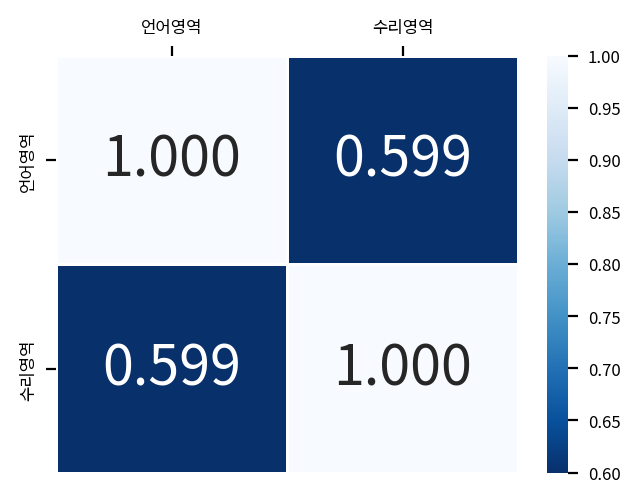

In [15]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 650              # 그래프 가로크기
height_px = 500             # 그래프 세로크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Heatmap 그리기: seaborn 사용
sb.heatmap(data = corr_matrix, annot=True, fmt='0.3f', 
           linewidth = 0.5, cmap = "Blues_r", 
           annot_kws = {'size': 20})
  # camp: 칼라맵 종류: 'Greys', 'Purples', 'Blues', 'Greens', 
  # 'Oranges', 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 
  # 'RdPu', 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 
  # 'BuGn', 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 
  # 'RdBu', 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 
  # 'bwr', 'seismic' / 'berlin', 'managua', 'vanimo'
  
# 3) 그래프 꾸미기: 
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()     # x축 변수 이름을 상단으로 이동 

# 4) 출력
plt.tight_layout()         # 여백 제거
plt.show()                 # 그래프 화면 출력
plt.close()                # 그래프 작업 종료

해석 템플릿:

'''
1. 피어슨 r 상관계수 선택의 근거:

본 분석에서는 {변수1}과 {변수2} 간 상관관계를 검토하였다.

데이터 점검 결과, 두 변수의 관계는  선형적이며 이상치의 영향도 크지 않아 피어슨 상관계수를 사용하였다.

분석 결과, 피어슨 상관계수는 r = {r값}, p = {p값}로 나타나 두 변수 간 {상관 방향} 관계가 통계적으로 유의함을 확인하였다.
'''

'''
2. 스피어만 r 상관계수 선택의 근거:
   
본 분석에서는 {변수1}과 {변수2} 간 상관관계를 평가하였다.

데이터 점검 과정에서 비선형 관계 가능성 또는 이상치 영향이 확인되어 스피어만 상관계수를 사용하였다.

분석 결과, 스피어만 상관계수는 rho = {rho값}, p = {p값}로 나타나 두 변수 간 {단조 관계 방향} 관계가 통계적으로 유의함을 확인하였다.
'''
↓

## #04. 인사이트

1. 피어슨 r 상관계수 선택의 근거